<h1 style="color:DodgerBlue;">Code for Plotting Sodium Chronoamperometry Data</h1>

In [1]:
import sys
sys.path.insert(0, '/Users/kedzie/repos/notebooks/utilities')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable

from utility_functions.utils import * #read_data, read_press, getnearpos, folder_files, headspace
from matplotlib import rcParams as rc
rc['mathtext.default'] = 'regular'

def oerorr(oer, orr):
    return(oer/orr)

In [37]:
# superior= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190513_Na_Superiorgraphite_CA_test/')
# supp= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190513_Na_Superiorgraphite_CA_test/190513_Na_Superiorgraphite_CA_test_p_Ch1__2019-05-13_11.17_00.txt')
# plot_na_CA(superior[1], superior[3], superior[4], superior[5], supp, 1, 'b')
#plt.savefig('/Users/kedzie/Desktop/superior 5uA cutoff.png', transparent = True, dpi=600, bbox_inches='tight')


# mcmb1=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190514_Na_MCMB_CA_cyclingstudy_cycle1/')
# mcmb1p=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190514_Na_MCMB_CA_cyclingstudy_cycle1/190514_Na_MCMB_CA_cyclingstudy_Ch1__2019-05-14_14.48_25.txt')
# plot_na_CA(mcmb1[1], mcmb1[3], mcmb1[4], mcmb1[5], mcmb1p, 1, 'b')

mcmb519_1= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190517_Na_newMCMB_CA_cycling/')
m5191p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190517_Na_newMCMB_CA_cycling/190517_Na_newMCMB_CA_cycling_cycle1_Ch1__2019-05-17_10.59_42.txt')
#plot_na_CA(mcmb519_1[1], mcmb519_1[3], mcmb519_1[4], mcmb519_1[5], m5191p, 1, 'b')

mcmb519_2= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190521_Na_newMCMB_CA/')
m5191p2= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190521_Na_newMCMB_CA/190521_Na_newMCMB_cycling_cycle1_Ch1__2019-05-21_13.21_51.txt')
plot_na_CA(mcmb519_2[1], mcmb519_2[3], mcmb519_2[4], mcmb519_2[5], m5191p2, 1, 'b')

mcmb519_3=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190523_Na_newMCMB_cycling/')
mcmb5193p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190523_Na_newMCMB_cycling/190523_Na_newMCMB_cycling_cycle1_Ch1__2019-05-23_13.27_49.txt')
plot_na_CA(mcmb519_3[1], mcmb519_3[3], mcmb519_3[4], mcmb519_3[5], mcmb5193p, 1, 'b')



charge current: 0.49980649488372086mA


IndexError: single positional indexer is out-of-bounds

charge current: 0.9996640096551724mA
total moles of gas consumed: 36.45912732800268
total moles of gas evolved: 32.11180351229751
charge cap= 0.876441200574239
oer/orr: 0.8828622148110348
final current= 0.01508808
charge current: 0.9997447872727273mA
total moles of gas consumed: 35.37441647550956
total moles of gas evolved: 29.513477314833736
charge cap= 0.8981096082263522
oer/orr: 0.8376672584851389
final current= 0.015093805


()

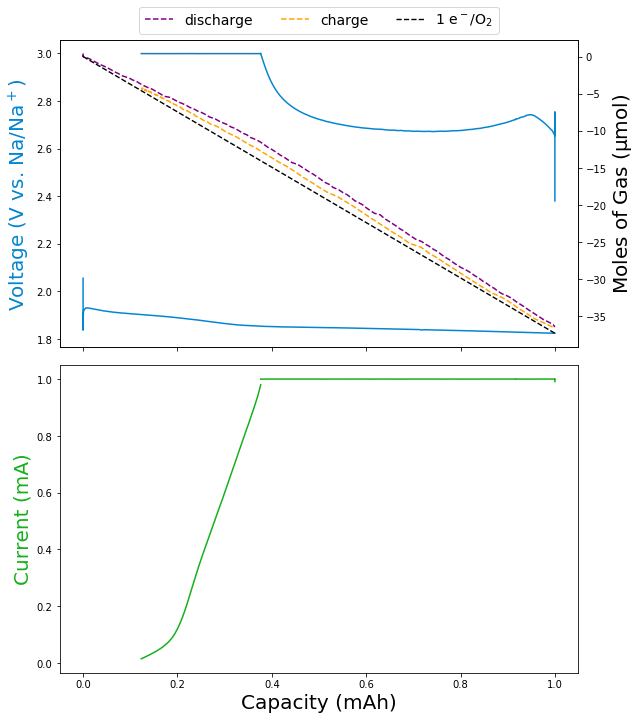

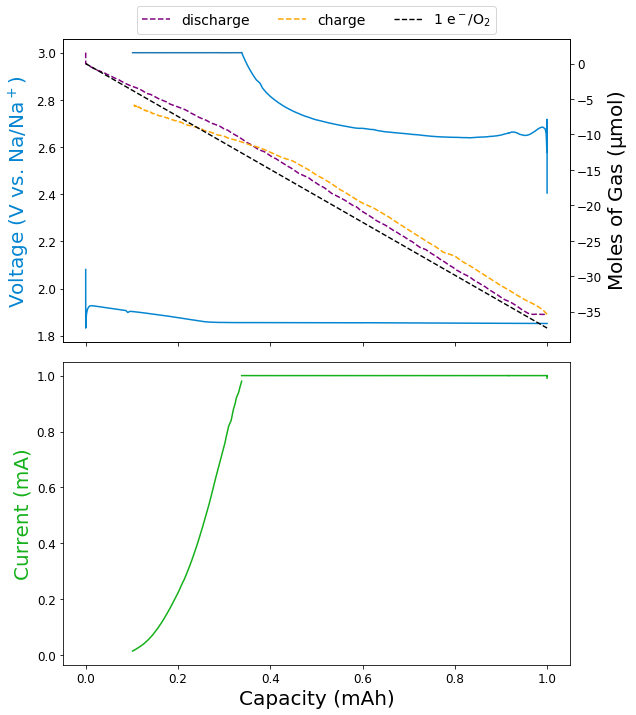

In [2]:
#this function plots two subplots for a sodium chronoamperometry cell:

#potential, gas, and current vs capacity are all ploted 

def plot_na_CA(discharge, cp1, cp2, ca, press, ch, c, leg=None):
    #set number e- per process
    n=1
    i_dis = -1*np.mean( discharge['I/mA'] ) #calculate discharge and charge current (mA)
    i_ch = np.mean(cp1['I/mA'])
    print('charge current: ' + str(i_ch) + 'mA')
    if leg == None:
        leg=''
    
    cp2['Capacity/mA.h'] = cp2['Capacity/mA.h'] + cp1['Capacity/mA.h'].iloc[-1]
    ca['Capacity/mA.h'] = ca['Capacity/mA.h'] + cp2['Capacity/mA.h'].iloc[-1]   
    umoles = press['pressure/torr']/760*headspace(ch)/(press['temperature/C']+273)/0.082057
    umoles = umoles-umoles.iloc[0]
    
    cap = []
    curr = []

    files_ec = pd.concat([discharge, cp1, cp2, ca], sort=True) ##### add cp2
    
    for i in range(len(umoles)):
        dex = getnearpos( files_ec['time/s'], press['time/s'].iloc[i] )
        cap.append( files_ec['Capacity/mA.h'].iloc[dex] )
        curr.append( files_ec['I/mA'].iloc[dex] )

    umolesdf = pd.DataFrame( press['time/s'], columns=['time/s'] )
    umolesdf['umoles'] = umoles
    umolesdf['Capacity/mA.h'] = cap
    umolesdf['I/mA'] = curr
    
    
    st1= discharge['time/s'].iloc[0]
    end1= discharge['time/s'].iloc[-1]
    st2=cp1['time/s'].iloc[0]
    end2=cp1['time/s'].iloc[-1]
    st3=cp2['time/s'].iloc[0]
    end3=cp2['time/s'].iloc[-1]
    st4=ca['time/s'].iloc[0]
    end4=ca['time/s'].iloc[-1]
    end_cap = [discharge['Capacity/mA.h'].iloc[-1], cp1['Capacity/mA.h'].iloc[-1], cp2['Capacity/mA.h'].iloc[-1], ca['Capacity/mA.h'].iloc[-1]]

    
    fig, (ax, ax3)= plt.subplots(2, sharex=True, figsize= (9,10)) 
    ax2=ax.twinx()
    
    ax.plot((discharge['Capacity/mA.h']), discharge['Ewe/V'], color='xkcd:cerulean', label=leg)
    ax.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['Ewe/V'], color='xkcd:cerulean', label='')
    ax.plot(end_cap[0]-cp2['Capacity/mA.h'], cp2['Ewe/V'], color='xkcd:cerulean', label='')
    ax.plot(end_cap[0]- ca['Capacity/mA.h'], ca['Ewe/V']) 
    

    st_p1 = getnearpos(press['time/s'],st1) #find time at beginning of discharge
    end_p1 = getnearpos(press['time/s'],end1) #find time at end of discharge
    
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    
    st_p3 = getnearpos(press['time/s'],st3)
    end_p3 = getnearpos(press['time/s'],end3)
    
    st_p4 = getnearpos(press['time/s'],st4)
    end_p4 = getnearpos(press['time/s'],end4)
    umolesdf['umoles'] = umolesdf['umoles']-umolesdf['umoles'].iloc[st_p1]

    
    x=[0, end_cap[0]]
    y=[0,-end_cap[0]*3.6/n/96485*10**6]
    
    print('total moles of gas consumed: ' + str(-umoles.iloc[end_p1]+umoles.iloc[st_p1]))
    
    print('total moles of gas evolved: ' + str(umoles.iloc[end_p4-5]-umoles.iloc[st_p2]))
    oerorr=(umoles.iloc[end_p4]-umoles.iloc[st_p2])/(-umoles.iloc[end_p1]+umoles.iloc[st_p1])
    
    print('charge cap= ' + str( ca['Capacity/mA.h'].iloc[-1] ) )
    print('oer/orr: '+ str(oerorr))
    print('final current= ' + str(ca['I/mA'].iloc[-1]))
    pressure_gap=umoles.iloc[end_p1]-umoles.iloc[st_p2]
    ax2.plot(umolesdf['Capacity/mA.h'][:end_p1+1], umolesdf['umoles'][:end_p1+1], '--', color='purple', label='discharge' )
    ax2.plot(end_cap[0]-umolesdf['Capacity/mA.h'][st_p2:end_p4-1], (umolesdf['umoles']+pressure_gap)[st_p2:end_p4-1], '--', color='orange', label='charge' )
    
    ax2.plot(x,y, 'k--', linewidth=1.4, label= str(n)+' e$^-$/O$_2$')
    #ax2.legend(loc='best') #, bbox_to_anchor=(0.5, 0.8))
    
    #ax2.plot( [0.025], [-0.5746], 'o', color='orange')
    ax3.plot(end_cap[0] - cp1['Capacity/mA.h'], cp1['I/mA'], '-', color='xkcd:green', markersize=2)
    ax3.plot(end_cap[0] - cp2['Capacity/mA.h'], cp2['I/mA'], '-', color='xkcd:green', markersize=2)
    ax3.plot(end_cap[0] - ca['Capacity/mA.h'], ca['I/mA'], '-', color='xkcd:green', markersize=2)
    
    
    ax.set_ylabel('Voltage (V vs. Na/Na$^+$)', color='xkcd:cerulean', fontsize=20)
    ax2.set_ylabel('Moles of Gas ($\mu$mol)', fontsize=20)
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=3, fancybox=True, facecolor='none', fontsize=14)
    
    ax3.set_xlabel('Capacity (mAh)', fontsize=20)
    ax3.set_ylabel('Current (mA)', fontsize=20, color='xkcd:green')
    #plt.xticks(np.arange(-1, end_cap[0]+.02, step=0.1))
    plt.tight_layout()
    #plt.savefig('/Users/kedzie/Desktop/sodium chronoamp2.png', transparent = True, dpi=600, bbox_inches='tight')

    #ca_titration= [-9.19296, -17.7156, -9.576, -6.99048, -3.54312, -34.09056, -35.62272, -0.67032]
#     ca_titration=[25.66368,17.14104,25.28064,27.86616,31.31352,0.76608,-0.76608,34.18632]
#     capi= [0.25, 0.5, 0.25, 0.2, 0.1, 1, 1, 1-end_cap[3]]
#     ax2.plot(capi, ca_titration, 'o', label='ca titration', markersize=5)
    
#     cpti= [27.57888, 30.6432]
    
#     ax2.plot([0.2,0.1], cpti, 'o', color='red', markersize=5, label='cp titration')
#     cati= [33.32448, 35.81424,29.30256,0]
#     cati2=[30.83472,33.32448,26.8128, -2.48976]
#     x=[0.1,0,0.2,1]
#     ax2.plot(x, cati2, 'o', color = 'green', markersize=4, label= 'ca 2nd cycle')
    
    rc['font.size'] = 12
    return ()


na=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/181106_Na_titrations_CA_fullcharge/')
press= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/181106_Na_titrations_CA_fullcharge/181106_Na_titrations_CA_cycle1_Ch1__2018-11-06_12.11_23.txt')



#plot_na_CA(na[3], na[5], na[6], na[7], press, 1, 'b')

#print(na[2]['time/s'].iloc[-1]/60/60)
#plt.savefig('/Users/kedzie/Desktop/superoxide titrations so far2.png', transparent = True, dpi=600, bbox_inches='tight')


c13= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190206_C13_CA_cycling/')
pp= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190206_C13_CA_cycling/190206_C13_CA_cycling_cycle1_Ch4__2019-02-06_11.12_16.txt')

#plot_na_CA(c13[1], c13[3],c13[4], c13[5],pp, 5, 'b')
#plot_na_CA(c13[8], c13[10],c13[11], c13[12],pp, 5, 'orange')

xc7= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190227_Na_testXC72withCA/')
p7= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190227_Na_testXC72withCA/190227_Na_testXC72withCA_p_Ch1__2019-02-27_12.28_47.txt')
#plot_na_CA(xc7[1], xc7[3], xc7[4], xc7[5], p7, 1, 'b')
#plt.savefig('/Users/kedzie/Desktop/xc72 na ca cycling.png', transparent = True, dpi=600, bbox_inches='tight')


newelyte= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190227_Na_test_newelyte_p50/')
elytep= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190227_Na_test_newelyte_p50/190222_004LG_7h-190227_Na_test_newelyte_p50_Ch3__2019-02-27_12.13_55.txt')
plot_na_CA(newelyte[1], newelyte[3], newelyte[4], newelyte[5], elytep, 3, 'b')

sieves= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190308_Na_newelytetest_molsieves24h/')
plot_na_CA(sieves[1], sieves[3], sieves[4], sieves[5], elytep, 3, 'b')





charge current: 0.020064749176470588mA
total moles of gas consumed: 0.5998666076377219
total moles of gas evolved: 0.08438820355877397
charge cap= 0.003988969967597061
oer/orr: 0.13434008558177268
final current= 0.0050628996


()

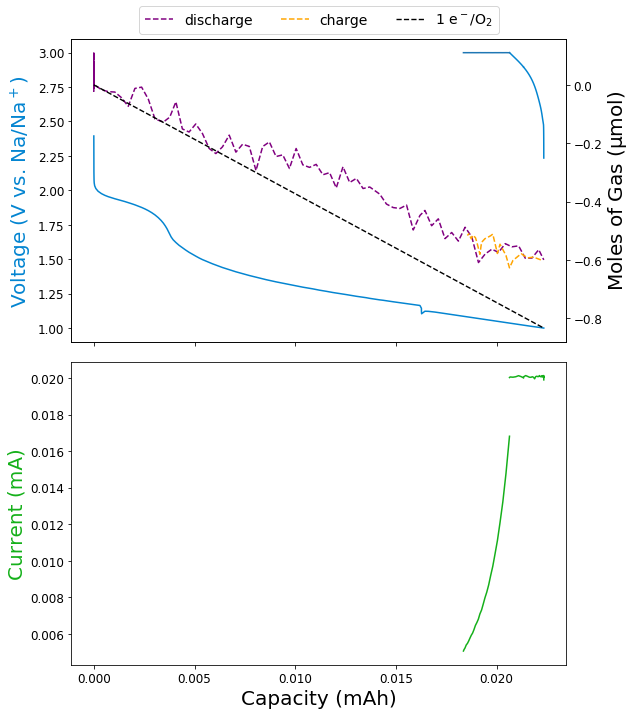

In [4]:
cmcfold= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190624_Na_MCMB_CMCSBR_CA/')
cmcCA= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190624_Na_MCMB_CMCSBR_CA/190624_Na_MCMB_CMCSBR_CA_p_Ch3_edittime.txt')
plot_na_CA(cmcfold[1], cmcfold[3], cmcfold[4], cmcfold[5], cmcCA, 3, 'b')




charge current: 0.4997063609302325mA
total moles of gas consumed: 36.3777601344792
total moles of gas evolved: 35.486203267870096
charge cap= 0.42102865046925014
oer/orr: 0.9770276323408132
final current= 0.0050325952
charge current: 0.49993595789473666mA
total moles of gas consumed: 36.40152430334139
total moles of gas evolved: 34.94544393967068
charge cap= 0.30276412351263887
oer/orr: 0.9605507313366884
final current= 0.015087537
charge current: 0.4999070252380952mA
total moles of gas consumed: 36.82177888148824
total moles of gas evolved: 29.691716048881574
charge cap= 0.5416683935456806
oer/orr: 0.8091775929671966
final current= 0.069493435


()

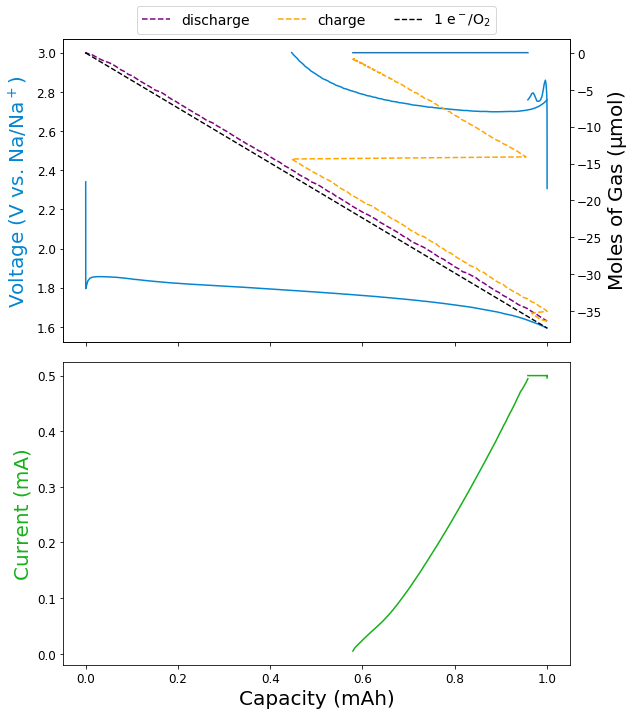

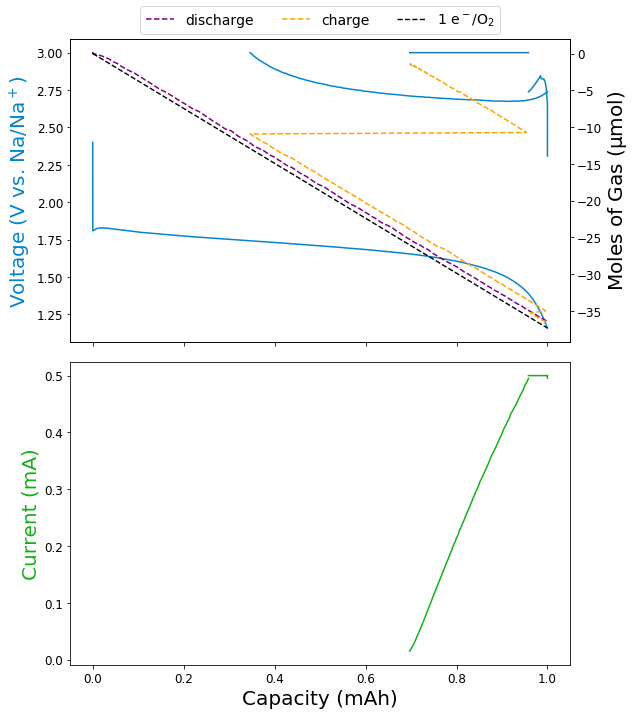

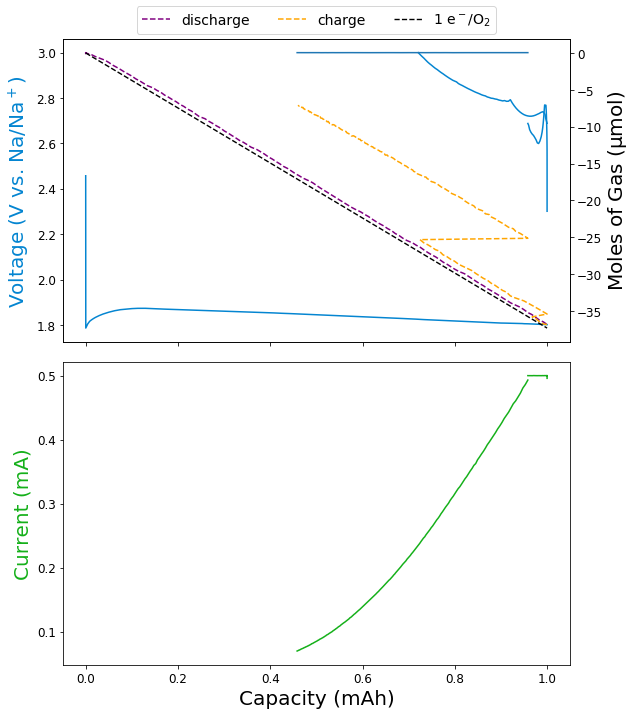

In [27]:
repeatmcmb=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190430_Na_MCMB_CA_repeat/')
mcpre= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190430_Na_MCMB_CA_repeat/190430_Na_MCMB_CA_repeat_press_Ch1__2019-04-30_10.45_43.txt')
plot_na_CA(repeatmcmb[1], repeatmcmb[3], repeatmcmb[4], repeatmcmb[5], mcpre, 1, 'b')
#plt.savefig('/Users/kedzie/Desktop/mcmb with titration.png', transparent = True, dpi=600, bbox_inches='tight')

mcmb= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190403_Na_MCMBgraphite_CA_slow/')
mcmbp= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190403_Na_MCMBgraphite_CA_slow/190403_Na_MCMBgraphite_CA_slow_Ch4__2019-04-03_15.20_58.txt')
plot_na_CA(mcmb[1], mcmb[3], mcmb[4], mcmb[5], mcmbp, 4, 'b')
#plt.savefig('/Users/kedzie/Desktop/mcmb trial 1.png', transparent = True, dpi=600, bbox_inches='tight')


pred= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190430_Na_Pred_CA/')
pp= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190430_Na_Pred_CA/190430_Na_Pred_CA_press_Ch2__2019-04-30_10.46_51.txt')
plot_na_CA(pred[1], pred[3], pred[4], pred[5], pp, 2, 'b')
#plt.savefig('/Users/kedzie/Desktop/pred 05mA current.png', transparent = True, dpi=600, bbox_inches='tight')





total moles of gas consumed: 35.65882340912768
total moles of gas evolved: 34.55669681487895
oer/orr: 0.9690452714589473
total moles of gas consumed: 35.715152859369454
total moles of gas evolved: 2.647973345066447
oer/orr: 0.07299858620126143
total moles of gas consumed: 35.715152859369454
total moles of gas evolved: 2.647973345066447
oer/orr: 0.07299858620126143


()

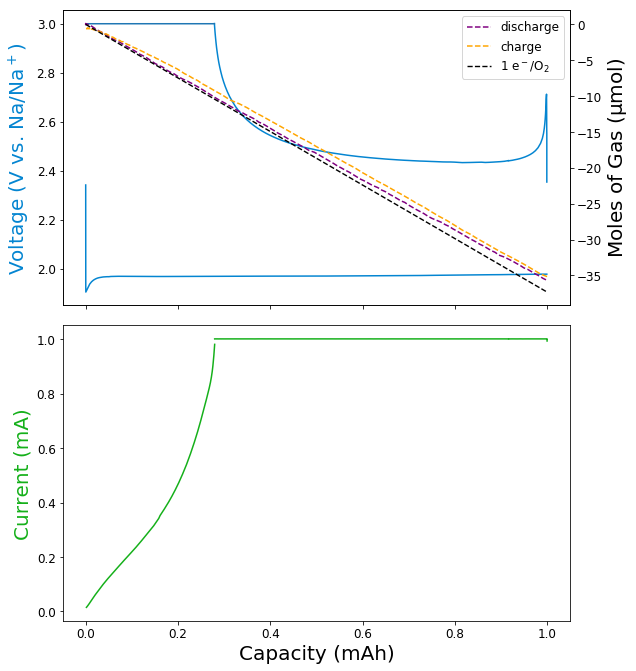

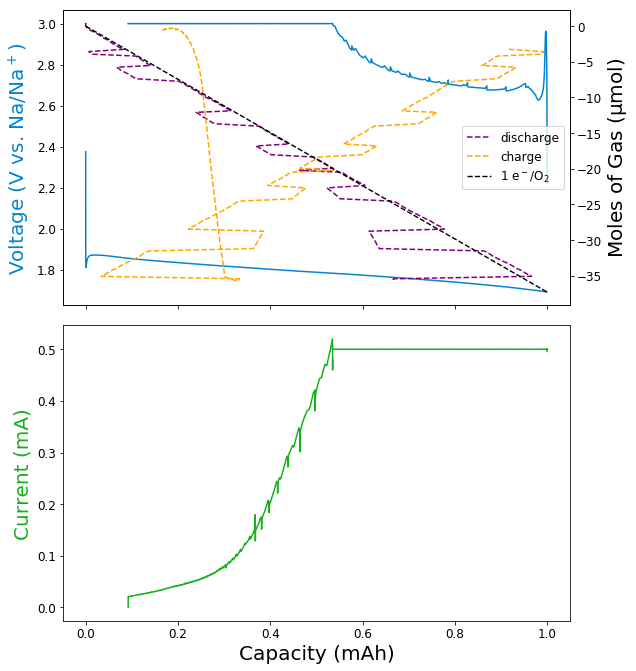

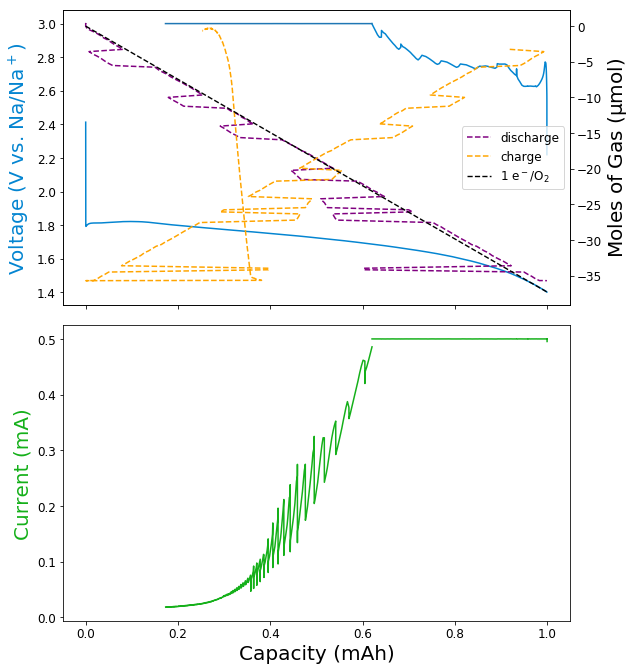

In [122]:
regu= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/181106_Na_titrations_CA_2cycle_90/')
reg_p=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/181106_Na_titrations_CA_2cycle_90/181106_Na_titrations_CA_90_cycle1_Ch4__2018-11-06_12.17_22.txt')

plot_na_CA( regu[3],regu[5], regu[6], regu[7], reg_p, 4, 'b')
#plt.savefig('/Users/kedzie/Desktop/regular ca.png', transparent = True, dpi=600, bbox_inches='tight')


mcmbdems= folder_files('/Users/kedzie/Desktop/190413_Na_graphite_MCMB_CA_dems/')

plot_na_CA(mcmbdems[1], mcmbdems[4], mcmbdems[5], mcmbdems[6], reg_p, 1, 'b')

preddems= folder_files('/Users/kedzie/Desktop/190413_Na_graphite_pred_CA_dems/')

plot_na_CA(preddems[1], preddems[4], preddems[5], preddems[6], reg_p, 1, 'b')





charge current: 0.9998902948148147mA
total moles of gas consumed: 37.093522693679475
total moles of gas evolved: 35.67397615004842
charge cap= 0.9771517084704505
oer/orr: 0.9618789795265114
final current= 0.015065243


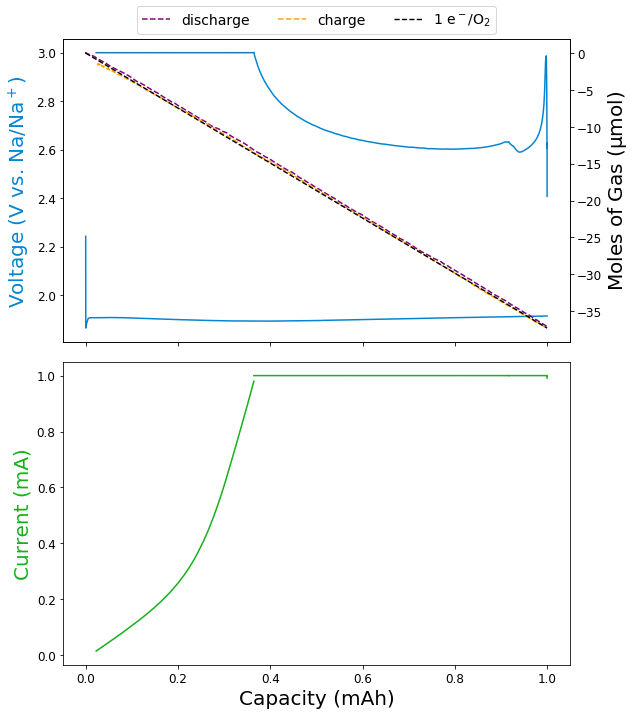

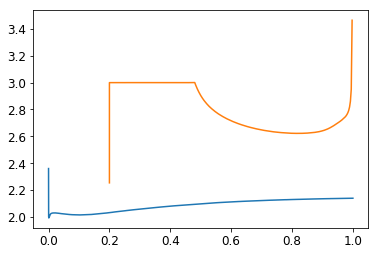

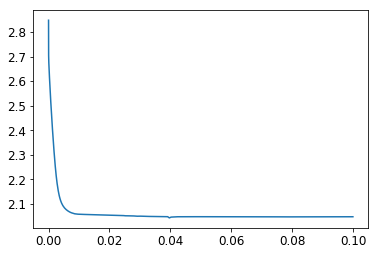

In [6]:
#newBASF= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190315_BASFelytetest_CA/')
#BASFp= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190315_BASFelytetest_CA/190315_BASFelytetest_CA_Ch1__2019-03-16_01.41_18.txt')
#plot_na_CA(newBASF[1], newBASF[3], newBASF[4], newBASF[5], BASFp, 1, 'b')

ptfep50= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190315_P50cathodewithPTFEslurry_CA/')
ptfep = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190315_P50cathodewithPTFEslurry_CA/190315_P50cathodewithPTFEslurry_CA_Ch5__2019-03-16_01.40_54.txt')
#plot_na_CA(ptfep50[1], ptfep50[3], ptfep50[4], ptfep50[5], ptfep, 1, 'b')

c13= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190321_13Ccathode_200Cfurnace_CA/')
c13p=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190321_13Ccathode_200Cfurnace_CA/190321_13Ccathode_200Cfurnace_CA_p_Ch3__2019-03-21_12.01_50.txt')
#plot_na_CA(c13[1], c13[3], c13[4], c13[5], c13p, 3, 'b')
#plt.savefig('/Users/kedzie/Desktop/c13 200C ca.png', transparent = True, dpi=600, bbox_inches='tight')

tci=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190326_Na_testingTCIelyte_CA/')
tcip= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190326_Na_testingTCIelyte_CA/190326_Na_testingTCIelyte_CA_p_Ch5__2019-03-26_17.05_46.txt')
plot_na_CA(tci[1], tci[3], tci[4], tci[5], tcip, 5, 'b')




ca_80= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190325_Na_SEM_010mAdisch_080mAh_CA_p50/')
ca80p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190325_Na_SEM_010mAdisch_080mAh_CA_p50/190325_Na_SEM_010mAdisch_080mAh_CA_Ch3__2019-03-25_15.23_24.txt')


plt.figure()
plt.plot(ca_80[1]['Capacity/mA.h'], ca_80[1]['Ewe/V'])
plt.plot(1-ca_80[3]['Capacity/mA.h'], ca_80[3]['Ewe/V'])

xcslow= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190325_Na_SEM_010mAh_disch_XC72/')
plt.figure()
plt.plot(xcslow[1]['Capacity/mA.h'],xcslow[1]['Ewe/V'] )

total moles of gas consumed: 26.96110041625718
total moles of gas evolved: 25.827437329727175
oer/orr: 0.9540167852781035


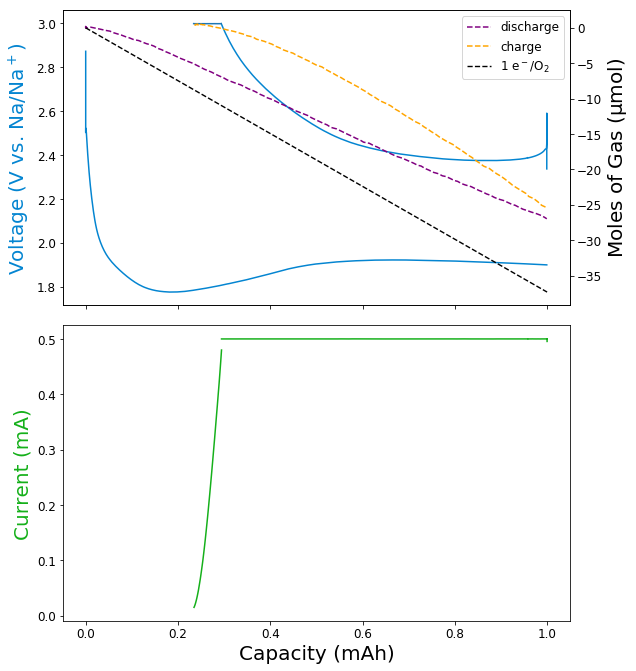

In [116]:
c13= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190206_C13_CA_cycling/')
c13_lv = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190206_C13_CA_cycling/190206_C13_CA_cycling_cycle1_Ch4__2019-02-06_11.12_16.txt')
plot_na_CA(c13[1], c13[3], c13[4], c13[5], c13_lv, 4, 'b' )
#plt.savefig('/Users/kedzie/Desktop/c13 original cycle.png', transparent = True, dpi=600, bbox_inches='tight')



fold= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180823_Na_cycling_chronoamp_cell2/')
p1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180823_Na_cycling_chronoamp_cell2/180823_Na_cycling_chronoamp_cell2_cycle1_p_Ch4__2018-08-23_14.51_59.txt')

#plot_na_CA(fold[3], fold[6],fold[7],fold[8], p1, 4, 'blue')

total moles of gas consumed: 37.37109799103433
total moles of gas evolved: 34.46215506427744
oer/orr: 0.9177729756755718


()

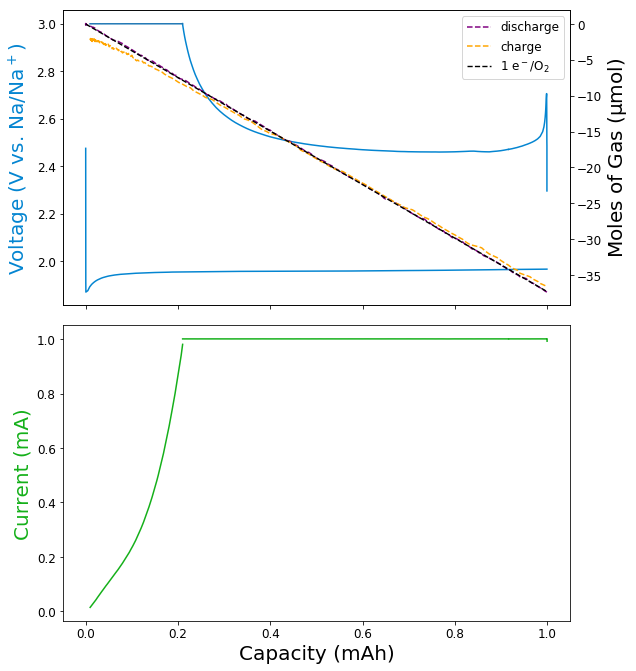

In [117]:


cy4fold= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell2/')
p1=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell2/180814_Na_lowercurrents_cell2_cycle1_p_Ch5__2018-08-14_11.12_09.txt')
plot_na_CA(cy4fold[3],cy4fold[6],cy4fold[7],cy4fold[8], p1, 5, 'blue')


In [118]:


#this data is for cycling Na with CA 3 times and then a final 4th discharge; this cell looked weird on the
#third cycle with the discharge only going to 0.5mAh and the pressure slope being much steeper

cy3fold= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190115_Na_3cycle_discharge_titration/')
p3cy=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190115_Na_3cycle_discharge_titration/190115_Na_3cycle_discharge_titration_p_Ch5__2019-01-15_13.32_38.txt')



plt.figure()
i=490
j=1000
plt.plot(cy3fold[2]['Capacity/mA.h'], cy3fold[2]['Ewe/V'], label='1')

plt.plot(cy3fold[4]['Capacity/mA.h'], cy3fold[4]['Ewe/V'], label='2')

plt.plot(cy3fold[6]['Capacity/mA.h'], cy3fold[6]['Ewe/V'], label='3')
plt.plot(cy3fold[8]['Capacity/mA.h'], cy3fold[8]['Ewe/V'], label='4')
plt.legend()

plt.figure()
plt.plot(cy3fold[2]['Capacity/mA.h'], cy3fold[2]['<I>/mA'], label='1')

plt.plot(cy3fold[4]['Capacity/mA.h'], cy3fold[4]['<I>/mA'], label='2')

plt.plot(cy3fold[6]['Capacity/mA.h'], cy3fold[6]['<I>/mA'], label='3')
plt.plot(cy3fold[8]['Capacity/mA.h'], cy3fold[8]['I/mA'], label='4')
plt.legend()
disch1 = cy3fold[2].iloc[np.isclose(cy3fold[2]['Ns'], 1)]
chrg1 = cy3fold[2].iloc[np.isclose(cy3fold[2]['Ns'], 2)]

plt.figure()
plt.plot(disch1['Capacity/mA.h'], disch1['Ewe/V'])
plt.plot(chrg1['Capacity/mA.h'], chrg1['Ewe/V'])
plt.plot(chrg1['Capacity/mA.h'], chrg1['<I>/mA'])
print(chrg1['<I>/mA'].iloc[388])


#print(chrg1['time/s'].iloc[-1]/3600)



        

KeyError: 'time/s'

In [ ]:
cy2= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180823_Na_cycling_chronoamp_cell1/')
plt.figure()
end = cy2[6]['Capacity/mA.h'].iloc[-1]
plt.plot(cy2[3]['Capacity/mA.h'], cy2[3]['Ewe/V'])
plt.plot(cy2[6]['Capacity/mA.h'], cy2[6]['Ewe/V'])
plt.plot(cy2[7]['Capacity/mA.h'] + end , cy2[7]['Ewe/V'])
plt.plot(cy2[7]['Capacity/mA.h'].iloc[-1] + end + cy2[8]['Capacity/mA.h'], cy2[8]['Ewe/V'])

plt.plot(cy2[13]['Capacity/mA.h'], cy2[13]['Ewe/V'])
plt.plot(cy2[16]['Capacity/mA.h'], cy2[16]['Ewe/V'])
plt.plot(cy2[17]['Capacity/mA.h'] + cy2[16]['Capacity/mA.h'].iloc[-1] , cy2[17]['Ewe/V'])
plt.plot(cy2[17]['Capacity/mA.h'].iloc[-1] + cy2[18]['Capacity/mA.h'] +cy2[16]['Capacity/mA.h'].iloc[-1], cy2[18]['Ewe/V'])


NUM_COLORS = 8

cm = plt.get_cmap('summer')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax.plot(cy2[3]['Capacity/mA.h'], cy2[3]['Ewe/V'], color=cm(1.*0/NUM_COLORS))
ax.plot(1-cy2[6]['Capacity/mA.h'], cy2[6]['Ewe/V'], color=cm(1.*0/NUM_COLORS))
ax.plot(1-cy2[7]['Capacity/mA.h'] - end , cy2[7]['Ewe/V'])
ax.plot(1-cy2[7]['Capacity/mA.h'].iloc[-1] - end - cy2[8]['Capacity/mA.h'], cy2[8]['Ewe/V'])




ax.plot(cy2[13]['Capacity/mA.h'], cy2[13]['Ewe/V'])
ax.plot(1-cy2[16]['Capacity/mA.h'], cy2[16]['Ewe/V'])
ax.plot(1-cy2[17]['Capacity/mA.h'] - cy2[16]['Capacity/mA.h'].iloc[-1] , cy2[17]['Ewe/V'])
ax.plot(1-cy2[17]['Capacity/mA.h'].iloc[-1] - cy2[18]['Capacity/mA.h'] - cy2[16]['Capacity/mA.h'].iloc[-1], cy2[18]['Ewe/V'])


#for i in range(NUM_COLORS):
#    ax.plot(np.arange(10)*(i+1))
plt.show()





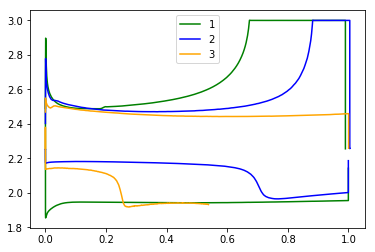

In [286]:


cy3foldcell1= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/181219_Na_CA_3cells/181219_3cycles_discharge_cell2/')

plt.figure()
plt.plot(cy3foldcell1[2]['Capacity/mA.h'][:417], cy3foldcell1[2]['Ewe/V'][:417], 'g', label='1')
plt.plot(cy3foldcell1[2]['Capacity/mA.h'][468:], cy3foldcell1[2]['Ewe/V'][468:], 'g',label='')

plt.plot(cy3foldcell1[4]['Capacity/mA.h'][:454], cy3foldcell1[4]['Ewe/V'][:454], 'b', label='2')
plt.plot(cy3foldcell1[4]['Capacity/mA.h'][519:], cy3foldcell1[4]['Ewe/V'][519:], 'b',label='')

plt.plot(cy3foldcell1[6]['Capacity/mA.h'][:2175], cy3foldcell1[6]['Ewe/V'][:2175], color='orange' ,label='3')
plt.plot(cy3foldcell1[6]['Capacity/mA.h'][2180:], cy3foldcell1[6]['Ewe/V'][2180:], color='orange' ,label='')
plt.legend()
#plt.savefig('/Users/kedzie/Desktop/3cyclesbad.png', transparent = True, dpi=600, bbox_inches='tight')







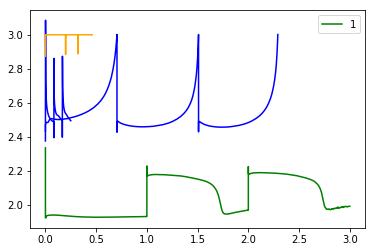

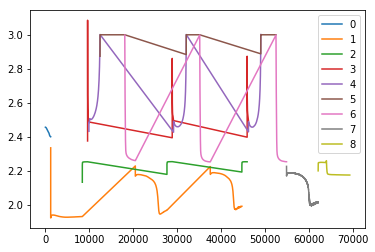

In [290]:
ca2= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190123_Na_3cycles_discharge_nogcpl/')
plt.figure()

plt.plot(ca2[1]['Capacity/mA.h'], ca2[1]['Ewe/V'], 'g', label='1')

plt.plot(ca2[3]['Capacity/mA.h'], ca2[3]['Ewe/V'], 'b', label='')
plt.plot(ca2[4]['Capacity/mA.h'], ca2[4]['Ewe/V'], 'b', label='')

plt.plot(ca2[5]['Capacity/mA.h'], ca2[5]['Ewe/V'], label='', color='orange')

plt.legend()
#plt.savefig('/Users/kedzie/Desktop/3cyclesgood.png', transparent = True, dpi=600, bbox_inches='tight')




plt.figure()
#using gcpl to cycle
for i in range(len(ca2)):
    if 'Ewe/V' in ca2[i]:
        plt.plot(ca2[i]['time/s'], ca2[i]['Ewe/V'], label=str(i))
    
    else:
        plt.plot(ca2[i]['time/s'], ca2[i]['<Ewe>/V'], label=str(i))
plt.legend()


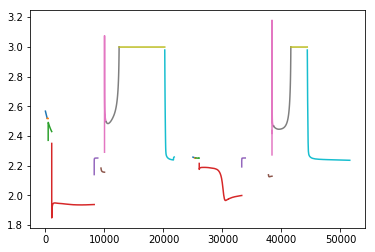

In [178]:
plt.figure()
for i in range(10):
    if 'Ewe/V' in cy2[i]:
        plt.plot(cy2[i]['time/s'], cy2[i]['Ewe/V'], label=str(i))
    
    else:
        plt.plot(cy2[i]['time/s'], cy2[i]['<Ewe>/V'], label=str(i))
for i in range(10,len(cy2)):
    if 'Ewe/V' in cy2[i]:
        plt.plot(cy2[i]['time/s']+25000, cy2[i]['Ewe/V'], label=str(i))
    
    else:
        plt.plot(cy2[i]['time/s']+25000, cy2[i]['<Ewe>/V'], label=str(i))


